<a href="https://colab.research.google.com/github/DIPANJAN001/Andrew-Ng-Machine-Learning-Notes/blob/master/NN_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
weather_data=pd.read_excel("/content/pv_02.xlsx") 

In [ ]:
weather_input1=weather_data.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=weather_data['power_normed']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_input,solpow, test_size=0.1, random_state=42,shuffle=False)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
def build_nn():
    model= Sequential(
                [Dense(512,activation='selu',input_shape=[49]),
                 Dense(256,activation='selu'),
                 Dropout(0.2),
                 Dense(128,activation='selu'),
                 Dense(64,activation='selu'),
                 Dense(1)
    ])
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])
    return model

In [ ]:
def build_nn1():
    model= Sequential(
                [Dense(256,activation='selu',input_shape=[49]),
                 Dense(128,activation='selu'),
                 Dropout(0.2),
                 Dense(64,activation='selu'),
                 Dense(32,activation='selu'),
                 Dense(1)
    ])
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])
    return model

In [ ]:
keras_reg1 = tf.keras.wrappers.scikit_learn.KerasRegressor(
                build_nn,epochs=1000,verbose=False)
keras_reg2 = tf.keras.wrappers.scikit_learn.KerasRegressor(
                build_nn1,epochs=1000,verbose=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


In [ ]:
keras_reg1._estimator_type = "regressor"
keras_reg2._estimator_type = "regressor"

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
import xgboost as xgb
xgb_reg=xgb.XGBRegressor(random_state=42)
st_reg=StackingRegressor(estimators=[('Dense',keras_reg1),('Dense1',keras_reg2)],final_estimator=XGBRegressor(random_state=42))

In [ ]:
def build_nn1():
    model= Sequential(
                [Dense(256,activation='selu',input_shape=[49]),
                 Dense(128,activation='selu'),
                 Dropout(0.2),
                 Dense(64,activation='selu'),
                 Dense(32,activation='selu'),
                 Dense(1)
    ])
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])
    return model

In [ ]:
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=49, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='mean_squared_error', optimizer='adam', metrics=['RootMeanSquaredError'])
	# fit model
	model.fit(X_train,y_train, epochs=100, verbose=0)
	return model

In [ ]:

# fit and save models
n_members = 5
for i in range(n_members):
	# fit model
	model = fit_model(X_train,y_train)
	# save model
	filename = 'models/model_' + str(i + 1) + '.h5'
	model.save(filename)
	print('>Saved %s' % filename)

>Saved models/model_1.h5
>Saved models/model_2.h5
>Saved models/model_3.h5
>Saved models/model_4.h5
>Saved models/model_5.h5


In [ ]:
from keras.models import load_model

In [ ]:
def load_all_model(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'models/model_' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [ ]:
# load all models
n_members = 5
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded models/model_1.h5
>loaded models/model_2.h5
>loaded models/model_3.h5
>loaded models/model_4.h5
>loaded models/model_5.h5
Loaded 5 models


In [ ]:
for model in members:
	_, rmse = model.evaluate(X_test,y_test, verbose=0)
	print('Model Accuracy: %.3f' % rmse)

Model Accuracy: 0.313
Model Accuracy: 0.313
Model Accuracy: 0.313
Model Accuracy: 0.313
Model Accuracy: 0.313


In [1]:
from tensorflow import keras
from keras import layers
from keras.constraints import maxnorm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,  Flatten, Input

In [2]:
from keras.wrappers.scikit_learn import KerasRegressor

In [99]:
def build_nn1():
    model= Sequential(
                [Dense(200,activation='selu',input_shape=[5]),
                 Dense(128,activation='selu'),
                 Dropout(0.2),
                 Dense(64,activation='selu'),
                 Dense(32,activation='selu'),
                 Dense(1)
    ])
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])
    return model

In [100]:
def build_nn2():
    model= Sequential(
                [Dense(128,activation='selu',input_shape=[5]),
                 Dense(64,activation='selu'),
                 Dropout(0.2),
                 Dense(32,activation='selu'),
                 Dense(16,activation='selu'),
                 Dense(1)
    ])
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])
    return model

In [101]:
def build_nn3():
    model= Sequential(
                [Dense(256,activation='selu',input_shape=[5]),
                 Dense(200,activation='selu'),
                 Dropout(0.2),
                 Dense(100,activation='selu'),
                 Dense(50,activation='selu'),
                 Dense(1)
    ])
    model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['RootMeanSquaredError'])
    return model

In [102]:
NN_clf1=KerasRegressor(build_fn=build_nn1, epochs=100, batch_size= 200)
NN_clf1._estimator_type = "regressor"
NN_clf2=KerasRegressor(build_fn=build_nn2, epochs=100, batch_size= 200)
NN_clf2._estimator_type = "regressor"
NN_clf3=KerasRegressor(build_fn=build_nn3, epochs=100, batch_size= 200)
NN_clf3._estimator_type = "regressor"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """


In [103]:
intermediate = [('NN1', NN_clf1), ('NN2', NN_clf2), ('NN3', NN_clf3)]

In [104]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [105]:
reg = StackingRegressor(estimators=intermediate,final_estimator=KNeighborsRegressor(n_neighbors=20,metric='euclidean'))


In [106]:
from sklearn import datasets

In [107]:
x, y, coef = datasets.make_regression(n_samples=1000,n_features=49,n_informative=1,noise=10,coef=True,random_state=0)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=42)

In [66]:
reg.fit(X_train, y_train)

Epoch 1/100
3/3 [==============================] - 0s 8ms/step - loss: 1427.3430 - root_mean_squared_error: 37.7802
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 1326.5231 - root_mean_squared_error: 36.4215
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 1224.7769 - root_mean_squared_error: 34.9968
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 1112.5825 - root_mean_squared_error: 33.3554
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 987.6868 - root_mean_squared_error: 31.4275
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 854.2654 - root_mean_squared_error: 29.2278
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 714.9523 - root_mean_squared_error: 26.7386
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 573.2783 - root_mean_squared_error: 23.9432
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 444.

Epoch 1/100
3/3 [==============================] - 0s 7ms/step - loss: 1502.7031 - root_mean_squared_error: 38.7647
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 1403.2194 - root_mean_squared_error: 37.4596
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 1313.2144 - root_mean_squared_error: 36.2383
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 1205.4514 - root_mean_squared_error: 34.7196
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 1089.7245 - root_mean_squared_error: 33.0110
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 959.4355 - root_mean_squared_error: 30.9748
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 819.9947 - root_mean_squared_error: 28.6355
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 679.5952 - root_mean_squared_error: 26.0690
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 539.

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 1450.2037 - root_mean_squared_error: 38.0815
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 1400.2896 - root_mean_squared_error: 37.4204
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 1357.2123 - root_mean_squared_error: 36.8404
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 1320.2832 - root_mean_squared_error: 36.3357
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 1276.1669 - root_mean_squared_error: 35.7235
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 1228.2081 - root_mean_squared_error: 35.0458
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 1167.6017 - root_mean_squared_error: 34.1702
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 1120.6503 - root_mean_squared_error: 33.4761
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 1

StackingRegressor(estimators=[('NN1',
                               <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3043de6390>),
                              ('NN2',
                               <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f302fb99e50>),
                              ('NN3',
                               <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3043de6490>)],
                  final_estimator=KNeighborsRegressor(metric='euclidean',
                                                      n_neighbors=20))

In [67]:
y_pred=reg.predict(X_test)

In [68]:
import matplotlib.pyplot as plt

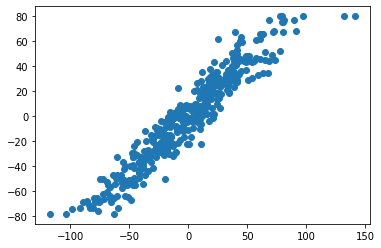

In [69]:
plt.scatter(y_test,y_pred)

In [109]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
from boruta import BorutaPy

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train, y_train)

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	44
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	44
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	44
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	44
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	44
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	44
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	44
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	44
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	44
I

array([27, 25,  8, 41, 43, 21,  1, 11,  3, 45, 40,  7,  2, 13, 22, 17, 19,
       39, 11, 15, 29, 33, 35,  1,  9, 23,  4, 16, 14, 36, 32,  1, 23,  5,
       36,  1,  1, 34, 27, 17, 44, 19,  9, 41, 26, 38, 31,  6, 30])

In [113]:
X_filtered = feat_selector.transform(X_train)

In [114]:
X_filtered

array([[ 0.64621777,  2.66272671, -0.38864297, -0.76203896, -0.10243703],
       [ 1.52473924,  0.17851056, -0.03465174, -1.03274667,  0.09205201],
       [-0.93180593, -2.26904333, -0.29382701, -1.23587708, -0.39248209],
       ...,
       [-2.07029657, -0.02722317, -0.88143779, -2.34453361,  0.02075395],
       [ 0.01050002, -0.21274028,  0.40234164, -1.7262826 , -1.16514984],
       [ 0.07521401,  1.81130479,  0.05549914,  0.29097198, -0.86938333]])

In [115]:
reg.fit(X_filtered, y_train)

Epoch 1/100
3/3 [==============================] - 0s 7ms/step - loss: 1438.2311 - root_mean_squared_error: 37.9240
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 1245.2031 - root_mean_squared_error: 35.2874
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 1071.4551 - root_mean_squared_error: 32.7331
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 923.4903 - root_mean_squared_error: 30.3890
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 771.7049 - root_mean_squared_error: 27.7796
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 628.9618 - root_mean_squared_error: 25.0791
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 498.0580 - root_mean_squared_error: 22.3172
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 389.3894 - root_mean_squared_error: 19.7330
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 291.1

StackingRegressor(estimators=[('NN1',
                               <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f303b8bd8d0>),
                              ('NN2',
                               <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f303b8bdb10>),
                              ('NN3',
                               <keras.wrappers.scikit_learn.KerasRegressor object at 0x7f303b8bde50>)],
                  final_estimator=KNeighborsRegressor(metric='euclidean',
                                                      n_neighbors=20))

In [116]:
X_filtered_test = feat_selector.transform(X_test)

In [117]:
y_pred=reg.predict(X_filtered_test)

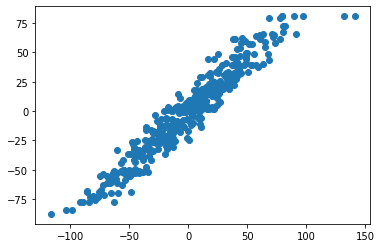

In [118]:
plt.scatter(y_test,y_pred)